## Data loading

In [1]:
import pandas as pd
from ml_model.src.data.data_preprocessing import DataPreprocessor

In [2]:
preprocessor = DataPreprocessor()

preprocessor.run_preprocessing_pipeline()
df = preprocessor.get()

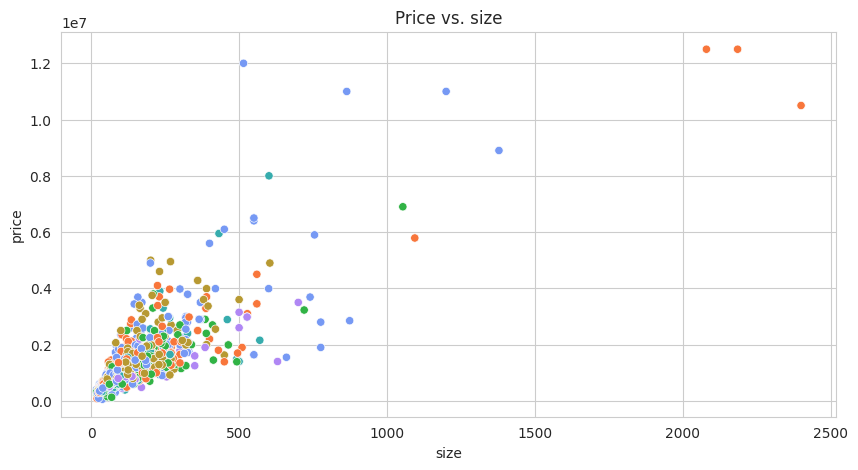

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x='size', y='price', data=df, hue='location', legend=False)
plt.title('Price vs. size')
plt.show()

In [4]:
df.head()

,status,size,property_type,rooms,floor,year_built,property_condition,location,price
0,wtórny,68.00,brak informacji,2.0,1,brak informacji,do zamieszkania,Nowe Miasto,630000.0
1,pierwotny,51.00,blok,3.0,1,2023,do wykończenia,Nowe Miasto,552520.0
2,wtórny,59.00,blok,3.0,1,brak informacji,brak informacji,Naramowice,649000.0
3,pierwotny,41.92,apartamentowiec,2.0,5,2023,brak informacji,Nowe Miasto,679000.0
4,wtórny,43.65,kamienica,2.0,3,1900,do zamieszkania,Stare Miasto,679000.0


In [8]:
df = df[df['price'].notna()]
df = df[df['size'].notna()]

In [12]:
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['size', 'price']] = scaler.fit_transform(df[['size', 'price']])

clf = IsolationForest(max_features=1, n_estimators=2000, max_samples=3, contamination=0.002, random_state=42).fit(df[['size', 'price']])
# clf = IsolationForest(n_estimators=200, contamination=0.001, random_state=42).fit(df[['size', 'price']])

df['outlier'] = clf.predict(df[['size', 'price']])
df['outlier_score'] = clf.decision_function(df[['size', 'price']])

print(len(df))
print(len(df[df['outlier'] == -1]))

2544
6


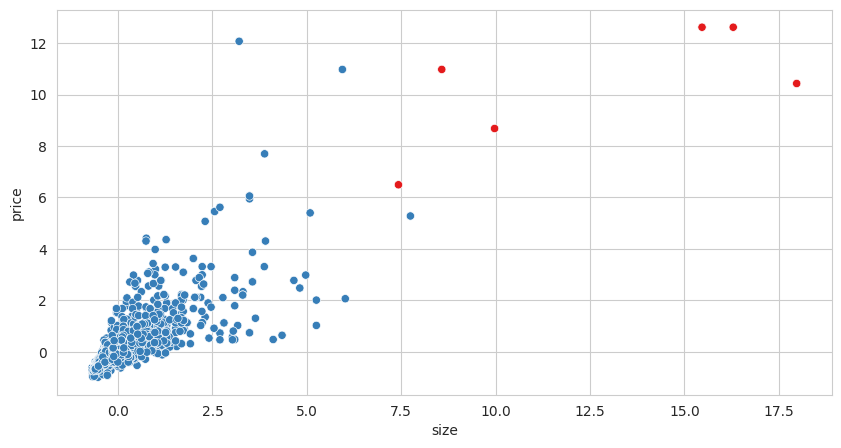

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x='size', y='price', data=df, hue='outlier', legend=False, palette='Set1')
# plt.annotate('outlier', xy=(1094.0, 5790000.0), xytext=(900, 4000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()